In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
meas = base.classes.measurement
stat = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(meas.date).order_by(meas.date.desc()).first()

('2017-08-23')

In [10]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
latest_data = session.query(meas.date, meas.prcp).\
    filter(meas.date >= one_year).\
    order_by(meas.date).all()
latest_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(latest_data, columns = ["Date", "Precipitation"])
prcp_df = prcp_df.set_index("Date")

In [13]:
# Sort the dataframe by date
prcp_df.sort_values(by="Date")
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


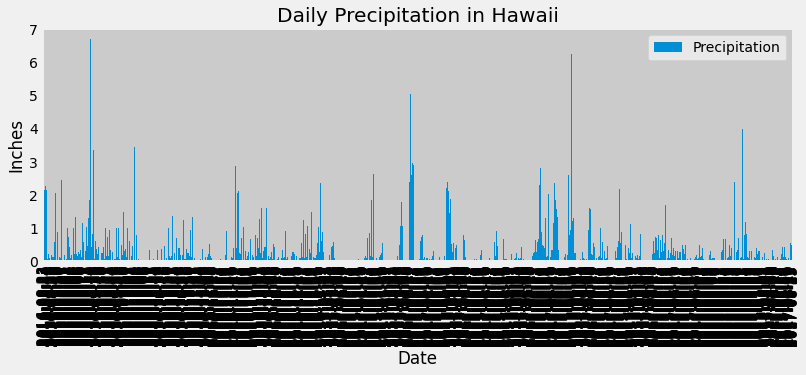

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind="bar", width=3, figsize=(12,4))
plt.grid(True)
plt.title("Daily Precipitation in Hawaii")
plt.ylabel("Inches")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df[["Precipitation"]].describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(stat.station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_rows = session.query(meas.station, func.count(meas.tobs)).group_by(meas.station).\
    order_by(func.count(meas.tobs).desc()).all()

most_active = most_rows[0][0]
most_active

'USC00519281'

In [18]:
# List the stations and the counts in descending order.
for station, count in most_rows:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(meas.station, func.avg(meas.tobs), func.max(meas.tobs), func.min(meas.tobs)).\
    filter(meas.station == most_active).\
    order_by(meas.tobs).all()
temp_stats

[('USC00519281', 71.66378066378067, 85.0, 54.0)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
most_active_data = session.query(meas.station, meas.date, meas.tobs).\
    filter(meas.date >= one_year).\
    filter(meas.station == most_active).\
    order_by(meas.date).all()
most_active_data

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [21]:
#Create DataFrame of results
most_active_df = pd.DataFrame(most_active_data, columns = ["Station", "Date", "Tobs"])
most_active_df = most_active_df.set_index("Station")
most_active_df

,Date,Tobs
Station,,
USC00519281,2016-08-23,77.0
USC00519281,2016-08-24,77.0
USC00519281,2016-08-25,80.0
USC00519281,2016-08-26,80.0
USC00519281,2016-08-27,75.0
...,...,...
USC00519281,2017-08-14,77.0
USC00519281,2017-08-15,77.0
USC00519281,2017-08-16,76.0


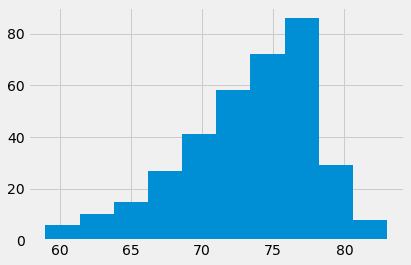

In [22]:
#Plot the results as a histogram
plt.grid(True)
plt.hist(most_active_df["Tobs"])
bin_size = 12
plt.xlabel = ("Temperature")
plt.ylabel = ("Frequency")
plt.show()

# Close session

In [24]:
# Close Session
session.close()